In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Parameters
DATA_PATH = '/content/drive/MyDrive/AI/NOTEEVENTS.csv'  # Change this
CHUNK_SIZE = 100000                    # Number of rows to process per batch

# Keywords
KEYWORDS = ["MASH", "NASH", "steatohepatitis"]

# Storage for matched patient IDs
mash_patients = set()

# Reading in chunks
reader = pd.read_csv(DATA_PATH, chunksize=CHUNK_SIZE)

for i, chunk in enumerate(reader):
    print(f"Processing chunk {i + 1}")

    # Ensure lowercase to avoid missing cases
    chunk['TEXT'] = chunk['TEXT'].astype(str)

    # Simple keyword filter (case-insensitive)
    mask = chunk['TEXT'].str.contains('|'.join(KEYWORDS), case=False, na=False)

    # Extract unique patient IDs from this batch
    matched_patients = chunk.loc[mask, 'SUBJECT_ID'].unique()

    # Add to our set
    mash_patients.update(matched_patients)

    print(f"Found {len(mash_patients)} unique patients so far.")

    # Stop if we reach 1000 patients
    if len(mash_patients) >= 1000:
        print("Target reached. Stopping batch processing.")
        break

print(f"\nFinal number of unique MASH-related patients: {len(mash_patients)}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing chunk 1
Found 273 unique patients so far.
Processing chunk 2
Found 273 unique patients so far.
Processing chunk 3
Found 273 unique patients so far.
Processing chunk 4
Found 281 unique patients so far.
Processing chunk 5
Found 293 unique patients so far.
Processing chunk 6
Found 315 unique patients so far.
Processing chunk 7
Found 325 unique patients so far.


/tmp/ipython-input-4-1131665397.py:19: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(reader):


Processing chunk 8
Found 354 unique patients so far.
Processing chunk 9
Found 396 unique patients so far.
Processing chunk 10
Found 433 unique patients so far.
Processing chunk 11
Found 461 unique patients so far.
Processing chunk 12
Found 495 unique patients so far.
Processing chunk 13
Found 533 unique patients so far.
Processing chunk 14
Found 551 unique patients so far.
Processing chunk 15
Found 573 unique patients so far.
Processing chunk 16
Found 597 unique patients so far.
Processing chunk 17
Found 616 unique patients so far.
Processing chunk 18
Found 616 unique patients so far.
Processing chunk 19
Found 617 unique patients so far.
Processing chunk 20
Found 617 unique patients so far.
Processing chunk 21
Found 619 unique patients so far.

Final number of unique MASH-related patients: 619


In [ ]:
# Convert set of patient IDs to a list for filtering
mash_patient_list = list(mash_patients)

# Storage for the filtered results
matched_rows = []

# Re-read the file in chunks
reader = pd.read_csv(DATA_PATH, chunksize=CHUNK_SIZE, low_memory=False)

for i, chunk in enumerate(reader):
    print(f"Extracting from chunk {i + 1}")

    # Filter rows where subject_id is in our mash_patient_list
    filtered_chunk = chunk[chunk['SUBJECT_ID'].isin(mash_patient_list)]

    matched_rows.append(filtered_chunk)

# Concatenate all filtered rows into a single dataframe
final_mash_data = pd.concat(matched_rows, ignore_index=True)

print(f"Total rows extracted: {len(final_mash_data)}")

# Save to CSV (optional)
final_mash_data.to_csv('/content/drive/MyDrive/AI/mash_patients_notes.csv', index=False)
print("Saved filtered patient notes to mash_patients_notes.csv")


Extracting from chunk 1
Extracting from chunk 2
Extracting from chunk 3
Extracting from chunk 4
Extracting from chunk 5
Extracting from chunk 6
Extracting from chunk 7
Extracting from chunk 8
Extracting from chunk 9
Extracting from chunk 10
Extracting from chunk 11
Extracting from chunk 12
Extracting from chunk 13
Extracting from chunk 14
Extracting from chunk 15
Extracting from chunk 16
Extracting from chunk 17
Extracting from chunk 18
Extracting from chunk 19
Extracting from chunk 20
Extracting from chunk 21
Total rows extracted: 58886
Saved filtered patient notes to mash_patients_notes.csv


In [ ]:
print(final_mash_data['SUBJECT_ID'].nunique())


619


In [ ]:
# Re-read the file to collect all unique patient IDs
reader = pd.read_csv(DATA_PATH, chunksize=CHUNK_SIZE, low_memory=False)

all_patients = set()

for i, chunk in enumerate(reader):
    print(f"Collecting patients from chunk {i + 1}")
    all_patients.update(chunk['SUBJECT_ID'].unique())

print(f"Total unique patients in dataset: {len(all_patients)}")

Total unique patients in dataset: 46146


In [ ]:
# Get all non-MASH patients
non_mash_patients = all_patients - mash_patients

print(f"Non-MASH patients available: {len(non_mash_patients)}")

Non-MASH patients available: 45527


In [ ]:
import random

# Target cohort size = mash patients / 2.4%
target_cohort_size = int(len(mash_patients) / 0.024)
non_mash_sample_size = target_cohort_size - len(mash_patients)

print(f"Target cohort size: {target_cohort_size}")
print(f"Sampling {non_mash_sample_size} non-MASH patients.")

# Set random seed for reproducibility
random.seed(42)

# Randomly sample non-MASH patients
random_sample = random.sample(list(non_mash_patients), non_mash_sample_size)

print(f"Sampled {len(random_sample)} non-MASH patients.")

Target cohort size: 25791
Sampling 25172 non-MASH patients.
Sampled 25172 non-MASH patients.


In [ ]:
# Combine mash and non-mash patients
final_patient_list = list(mash_patients) + random_sample

# Read the dataset again in chunks and filter rows
final_rows = []

reader = pd.read_csv(DATA_PATH, chunksize=CHUNK_SIZE, low_memory=False)

for i, chunk in enumerate(reader):
    print(f"Filtering chunk {i + 1}")
    filtered_chunk = chunk[chunk['SUBJECT_ID'].isin(final_patient_list)]
    final_rows.append(filtered_chunk)

# Combine everything
final_dataset = pd.concat(final_rows, ignore_index=True)

print(f"Total rows in final dataset: {len(final_dataset)}")

# Save the final combined dataset
final_dataset.to_csv('/content/drive/MyDrive/AI/final_patient_dataset.csv', index=False)
print("Final dataset saved as final_patient_dataset.csv")


Filtering chunk 1
Filtering chunk 2
Filtering chunk 3
Filtering chunk 4
Filtering chunk 5
Filtering chunk 6
Filtering chunk 7
Filtering chunk 8
Filtering chunk 9
Filtering chunk 10
Filtering chunk 11
Filtering chunk 12
Filtering chunk 13
Filtering chunk 14
Filtering chunk 15
Filtering chunk 16
Filtering chunk 17
Filtering chunk 18
Filtering chunk 19
Filtering chunk 20
Filtering chunk 21
Total rows in final dataset: 1171064
Final dataset saved as final_patient_dataset.csv


In [ ]:
import pandas as pd
import re

# Load the final dataset (if not already loaded)
final_dataset = pd.read_csv('/content/drive/MyDrive/AI/final_patient_dataset.csv', low_memory=False)

# Basic preprocessing function
def clean_text(text):
    text = str(text).lower()                             # Lowercase
    text = re.sub(r'\d+', ' ', text)                     # Remove digits
    text = re.sub(r'[^a-z\s]', ' ', text)                # Remove punctuation & special chars
    text = re.sub(r'\s+', ' ', text).strip()             # Remove extra spaces
    return text

# Apply to the TEXT column
final_dataset['CLEAN_TEXT'] = final_dataset['TEXT'].apply(clean_text)

print("Basic text cleaning done.")

# (Optional) Save intermediate cleaned data
final_dataset.to_csv('/content/drive/MyDrive/AI/final_patient_dataset_cleaned.csv', index=False)
print("Cleaned dataset saved as final_patient_dataset_cleaned.csv")


Basic text cleaning done.
Cleaned dataset saved as final_patient_dataset_cleaned.csv


In [ ]:
final_dataset =pd.read_csv('/content/drive/MyDrive/AI/final_patient_dataset_cleaned.csv')
final_dataset.head(5)

/tmp/ipython-input-9-1580476857.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  final_dataset =pd.read_csv('/content/drive/MyDrive/AI/final_patient_dataset_cleaned.csv')


,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT,CLEAN_TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...,admission date discharge date service addendum...
1,181,42130,114236.0,2150-03-01,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2150-2-25**] ...,admission date discharge date date of birth se...
2,182,56174,163469.0,2118-08-12,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-8-10**] ...,admission date discharge date date of birth se...
3,183,56174,189681.0,2118-12-09,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-12-7**] ...,admission date discharge date date of birth se...
4,227,10044,124073.0,2152-10-11,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2152-10-2**] Dischar...,admission date discharge date service medicine...


In [ ]:
# Quick overview
print(final_dataset.info())
print(final_dataset.head())

# Number of unique patients
print("Unique patients:", final_dataset['SUBJECT_ID'].nunique())

# Number of notes per patient
notes_per_patient = final_dataset.groupby('SUBJECT_ID').size()
print(notes_per_patient.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171064 entries, 0 to 1171063
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ROW_ID       1171064 non-null  int64  
 1   SUBJECT_ID   1171064 non-null  int64  
 2   HADM_ID      1040765 non-null  float64
 3   CHARTDATE    1171064 non-null  object 
 4   CHARTTIME    994536 non-null   object 
 5   STORETIME    699998 non-null   object 
 6   CATEGORY     1171064 non-null  object 
 7   DESCRIPTION  1171064 non-null  object 
 8   CGID         699998 non-null   float64
 9   ISERROR      522 non-null      float64
 10  TEXT         1171064 non-null  object 
 11  CLEAN_TEXT   1171020 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 107.2+ MB
None
   ROW_ID  SUBJECT_ID   HADM_ID   CHARTDATE CHARTTIME STORETIME  \
0     174       22532  167853.0  2151-08-04       NaN       NaN   
1     181       42130  114236.0  2150-03-01       NaN       NaN   
2

In [ ]:
# Add a column for text length (in words)
final_dataset['TEXT_LENGTH'] = final_dataset['CLEAN_TEXT'].apply(lambda x: len(str(x).split()))

# Describe text length
print(final_dataset['TEXT_LENGTH'].describe())

count    1.171064e+06
mean     2.324000e+02
std      3.111573e+02
min      1.000000e+00
25%      6.400000e+01
50%      1.410000e+02
75%      2.630000e+02
max      7.286000e+03
Name: TEXT_LENGTH, dtype: float64


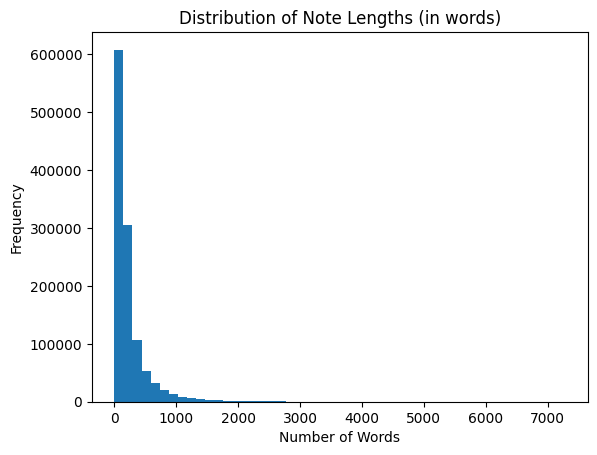

In [ ]:
import matplotlib.pyplot as plt

plt.hist(final_dataset['TEXT_LENGTH'], bins=50)
plt.title('Distribution of Note Lengths (in words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# Load English stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from collections import Counter

# Initialize word counts
word_counts = Counter()

# Process each row, remove stopwords, and count
for text in final_dataset['CLEAN_TEXT'].dropna():
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    word_counts.update(filtered_words)

# Show top 20 words (without stopwords)
print(word_counts.most_common(20))

[('pt', 1722457), ('name', 1497224), ('mg', 1427562), ('left', 1224741), ('ml', 1140834), ('right', 1132828), ('pm', 974675), ('patient', 952496), ('p', 937351), ('l', 924197), ('last', 883818), ('hospital', 814712), ('c', 797027), ('w', 769713), ('chest', 727148), ('plan', 719398), ('normal', 707337), ('po', 699508), ('reason', 679949), ('hr', 679266)]


In [ ]:
# Define custom stopwords
custom_stopwords = stop_words.union({'pt', 'am', 'pm', 'name', 'o', 's', 'p', 'c', 'w', 'l', 'po', 'patient', 'hospital', 'last', 'reason', 'continue', 'plan'})

# Recompute word counts
word_counts = Counter()

for text in final_dataset['CLEAN_TEXT'].dropna():
    words = text.split()
    filtered_words = [word for word in words if word not in custom_stopwords]
    word_counts.update(filtered_words)

# Show top 20 words (stopwords removed)
print(word_counts.most_common(20))

[('mg', 1427562), ('left', 1224741), ('ml', 1140834), ('right', 1132828), ('chest', 727148), ('normal', 707337), ('hr', 679266), ('clip', 655703), ('pain', 626666), ('dl', 616905), ('ct', 594078), ('blood', 569158), ('cc', 561717), ('assessment', 557489), ('x', 546239), ('status', 541019), ('stable', 524162), ('day', 522988), ('history', 507257), ('noted', 501385)]


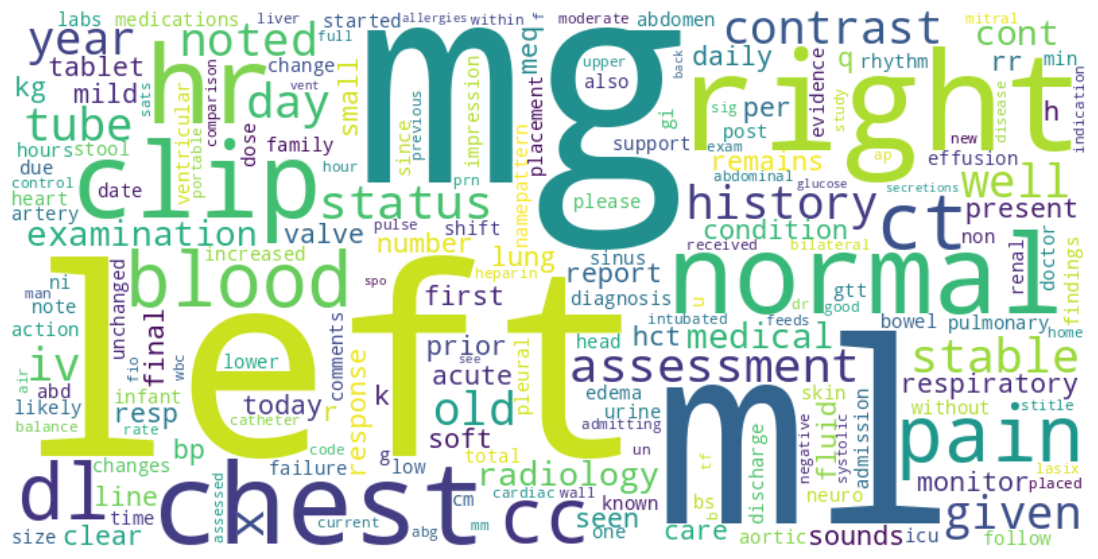

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming your word_counts variable exists from earlier
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate word cloud from word frequency dictionary
wordcloud.generate_from_frequencies(word_counts)

# Plot it
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Drop unwanted columns
columns_to_drop = ['CHARTTIME', 'STORETIME', 'CGID', 'ISERROR']
final_dataset_cleaned = final_dataset.drop(columns=columns_to_drop)

# Verify the cleaned dataframe
print(final_dataset_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171064 entries, 0 to 1171063
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ROW_ID       1171064 non-null  int64  
 1   SUBJECT_ID   1171064 non-null  int64  
 2   HADM_ID      1040765 non-null  float64
 3   CHARTDATE    1171064 non-null  object 
 4   CATEGORY     1171064 non-null  object 
 5   DESCRIPTION  1171064 non-null  object 
 6   TEXT         1171064 non-null  object 
 7   CLEAN_TEXT   1171020 non-null  object 
 8   TEXT_LENGTH  1171064 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 80.4+ MB
None


In [4]:
# Paths
folder_path = '/content/drive/MyDrive/AI/'
cleaned_file = folder_path + 'final_patient_dataset_cleaned.csv'
mash_file = folder_path + 'mash_patients_notes.csv'

# Load datasets
cleaned_df = pd.read_csv(cleaned_file)
mash_df = pd.read_csv(mash_file)

print(" Cleaned dataset shape:", cleaned_df.shape)
print(" MASH patients dataset shape:", mash_df.shape)

/tmp/ipython-input-4-1145434999.py:7: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_df = pd.read_csv(cleaned_file)


 Cleaned dataset shape: (1171064, 13)
 MASH patients dataset shape: (58886, 11)


In [5]:
print("Cleaned columns:", cleaned_df.columns)
print("MASH columns:", mash_df.columns)

Cleaned columns: Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME',
       'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT',
       'CLEAN_TEXT', 'MASH_LABEL'],
      dtype='object')
MASH columns: Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CHARTTIME',
       'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT'],
      dtype='object')


In [6]:
# Create a set of unique MASH patient IDs
mash_subjects = set(mash_df['SUBJECT_ID'].unique())

# Add a new column: 1 if MASH patient, else 0
cleaned_df['MASH_LABEL'] = cleaned_df['SUBJECT_ID'].apply(lambda x: 1 if x in mash_subjects else 0)

# Quick check
print("MASH patients labeled in cleaned dataset:", cleaned_df['MASH_LABEL'].sum())

MASH patients labeled in cleaned dataset: 58886


In [7]:
# Overwrite existing file (BE CAREFUL)
cleaned_df.to_csv(cleaned_file, index=False)
print(" Overwritten: final_patient_dataset_cleaned.csv")

 Overwritten: final_patient_dataset_cleaned.csv


In [8]:
cleaned_df.head(10)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT,CLEAN_TEXT,MASH_LABEL
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...,admission date discharge date service addendum...,0
1,181,42130,114236.0,2150-03-01,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2150-2-25**] ...,admission date discharge date date of birth se...,0
2,182,56174,163469.0,2118-08-12,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-8-10**] ...,admission date discharge date date of birth se...,0
3,183,56174,189681.0,2118-12-09,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-12-7**] ...,admission date discharge date date of birth se...,0
4,227,10044,124073.0,2152-10-11,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2152-10-2**] Dischar...,admission date discharge date service medicine...,0
5,233,99091,185274.0,2190-02-24,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2190-2-11**] ...,admission date discharge date date of birth se...,0
6,236,26601,116471.0,2127-07-30,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2127-7-21**] ...,admission date discharge date service med alle...,0
7,237,26601,155131.0,2131-12-29,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2131-12-23**] ...,admission date discharge date service medicine...,0
8,240,27051,113012.0,2194-02-02,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2194-1-7**] D...,admission date discharge date service medicine...,0
9,241,22663,187885.0,2165-09-28,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2165-9-23**] Discharge...,admission date discharge date date of birth se...,0
